In [1]:
import json
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import json
import os
# import uuid
import random

In [ ]:
labels = os.path.join('training_data','test.json')
count = 1
with open(labels,'r') as json_file:
    datas = json.load(json_file)
    for data in datas:
        img_name = data['image']['pathname']
        names = img_name.split('/')
        result = os.path.join('training_data',names[1],names[2])
        cmd = "copy " + result + " " + str(count) + ".jpg"
        os.system(cmd)
        objects = data['objects']
        count += 1
        print(result)

In [2]:
labels = os.path.join('training_data','test.json')
count = 1
countP = 0
with open(labels,'r') as json_file:
    datas = json.load(json_file)
    for data in datas:
        img_name = data['image']['pathname']
        names = img_name.split('/')
        result = os.path.join('training_data',names[1],names[2])
        img = Image.open(result)
        objects = data['objects']
        for obj in objects:
            minr = obj['bounding_box']['minimum']['r']
            minc = obj['bounding_box']['minimum']['c']
            maxr = obj['bounding_box']['maximum']['r']
            maxc = obj['bounding_box']['maximum']['c']
            category = obj['category']
            if category == "ring" or category == "trophozoite" or category == "schizont" or category == "gametocyte":
                draw = ImageDraw.Draw(img)
                draw.rectangle((minc, minr,maxc,maxr), fill=None,outline="red",width=5)
                countP = countP + 1
        save_path = os.path.join('test','labeled',str(count)+ "-label" + ".jpg")
        img.save(save_path)
        count += 1
#         break

In [3]:
print(countP)

303


W: 1600, H: 1200


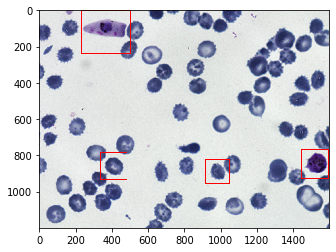

In [4]:
img = Image.open("training_data\\images\\225\\c7ec51d5-9f45-4209-8357-39e9a984a733.png")
bbs = "337,783,487,933,0 914,822,1051,959,0 1448,765,1600,930,1 233,0,508,240,1"
objects = bbs.split()
for obj in objects:
    bb = obj.split(',')
    draw = ImageDraw.Draw(img)
    draw.rectangle((int(bb[0]), int(bb[1]),int(bb[2]),int(bb[3])), fill=None,outline="red",width=5)
plt.imshow(img)
iw, ih = img.size
print("W: %d, H: %d" % (iw,ih))
img.save("simple.png")